In [14]:
"""
Lokals-Segment-Plot-Function:
This function will take a segment from dataframe Ex. Size Medium and you can select the timeframe
for sales for this Segment
Segments and values for function:
'Catagory': ['Top', 'Bottom', 'Dress', 'Jumpsuit']
'Size':     ['Small', 'Medium', 'Large']
'Color':    ['Black', 'White', 'Colored', 'Pattenred']

"""

"\nLokals-Segment-Plot-Function:\nThis function will take a segment from dataframe Ex. Size Medium and you can select the timeframe\nfor sales for this Segment\nSegments and values for function:\n'Catagory': ['Top', 'Bottom', 'Dress', 'Jumpsuit']\n'Size':     ['Small', 'Medium', 'Large']\n'Color':    ['Black', 'White', 'Colored', 'Pattenred']\n\n"

In [15]:
# Importing Library
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
# Importing DataFrame
new_dataframe = pd.read_csv('df-dates-seperated.csv')
new_dataframe.head() # see the Result

,Unnamed: 0,Age,Catagory,Size,Color,year,month,day
0,0,36.0,3.0,2.0,1.0,2019.0,9.0,14.0
1,1,30.0,0.0,0.0,1.0,2022.0,7.0,27.0
2,2,35.0,2.0,1.0,1.0,2022.0,4.0,14.0
3,3,16.0,1.0,1.0,3.0,2020.0,1.0,21.0
4,4,40.0,1.0,2.0,3.0,2020.0,7.0,12.0


In [41]:

def segments_plot(from_year,to_year,segment,segment_item):
    # Selecting the wwrite Text for Graph 
    if segment == 'Catagory':segment_name = ['Top', 'Bottom', 'Dress', 'Jumpsuit']
    elif segment == 'Size': segment_name = ['Small', 'Medium', 'Large']
    elif segment == 'Color': segment_name = ['Black', 'White', 'Colored', 'Pattenred']
    
    array_1 = [] # create an empty array
    if from_year <= to_year : # if segment set is correct " START YEAR  HAS TO BE LOWER THAN END YEAR
        
        if from_year == to_year: # If statment for only one year
            # setting the X labels 
            Cat_name = ['Jan'+str(from_year), 'Feb'+str(from_year), 'March'+str(from_year), 'April'+str(from_year),'may'+str(from_year),'June'+str(from_year),'July'+str(from_year),'Augost'+str(from_year),'sep'+str(from_year),'oct'+str(from_year),'nov'+str(from_year),'dec'+str(from_year)]
           # Selecting the data 
            selected_group = new_dataframe.loc[(new_dataframe["year"] == from_year)]
            if segment == 0: # no segment if all data is requested 
                selected_group_2 = selected_group
            else:  # If segment is selected
                # Selecting Data
                selected_group_2 = selected_group.loc[(selected_group[segment] == segment_item)]
            #Count the repetating for y values
            count_group = selected_group_2.groupby(['month'])['month'].count() 
            seleced_df = pd.DataFrame(Cat_name, columns=['month'])
            # append all of the years to one Array
            for x in count_group:
                array_1.append(x)
            array_1 = np.array(array_1)
        
        elif  from_year < to_year: # If statment for mmore than one year
            Cat_name = []
            
            # creating the x values with a loop
            for x in range(from_year,(to_year+1) ):
                Cat_name_1 = ['Jan '+str(x), 'Feb '+str(x), 'Mar '+str(x), 'Apr '+str(x),'may'+str(x),'Jun '+str(x),'Jul '+str(x),'Aug '+str(x),'Sep '+str(x),'Oct '+str(x),'Nov '+str(x),'Dec '+str(x)]
                Cat_name = np.concatenate((Cat_name, Cat_name_1))
                selected_group = new_dataframe.loc[(new_dataframe["year"] == x)]
                #Selecting without segment
                if segment == 0:
                    selected_group_2 = selected_group
                else:  # selecting Segment 
                    selected_group_2 = selected_group.loc[(selected_group[segment] == segment_item)]
                count_group = selected_group_2.groupby(['month'])['month'].count() 
                seleced_df = pd.DataFrame(Cat_name, columns=['month'])
                for x in count_group:
                    array_1.append(x)
        array_1 = np.array(array_1) 
    
        
    else:
        print("from year has to be smaller or equil to to year")
    
    seleced_df = seleced_df.assign(Count = array_1)    
    
    # plot the lists
    plt.plot(Cat_name,array_1,color="g")
   

    #plot Visual
    plt.xticks(np.arange(0, len(Cat_name),len(Cat_name)/4 ))
    plt.plot(Cat_name,array_1,color="g")
    plt.xlabel("Months")
    plt.ylabel("Sales Count")
    plt.grid()
    plt.plot(array_1, marker = '.', color = '#B8B6B6')
     # if statment for plot tittle
    if segment == 0: 
        title = "All - From "+Cat_name[0] +" to "+ Cat_name[-1]
        plt.title(title)
        plt.savefig('segment_graph/'+title+'.png')
        
    else:
        title = segment+" - "+segment_name[segment_item]+" - From "+Cat_name[0] +" to "+ Cat_name[-1]
        plt.title(title)
        plt.savefig('segment_graph/'+title+'.png')
    
    plt.show()                                                                         
                             

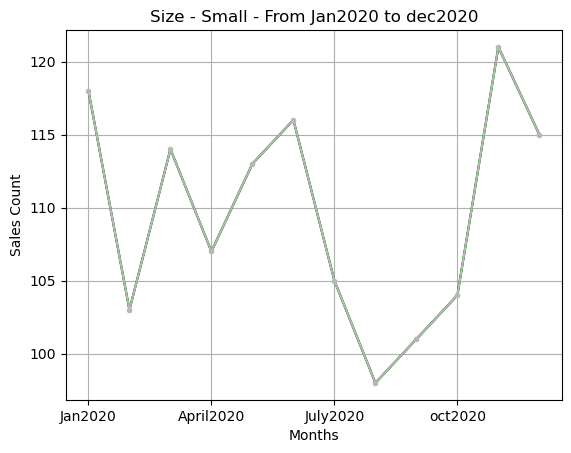

In [42]:
segments_plot(2020,2020,"Size",0)

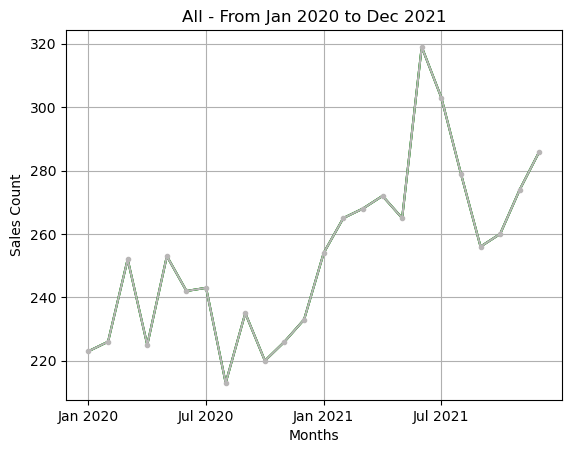

In [43]:
segments_plot(2020,2021,0,0)

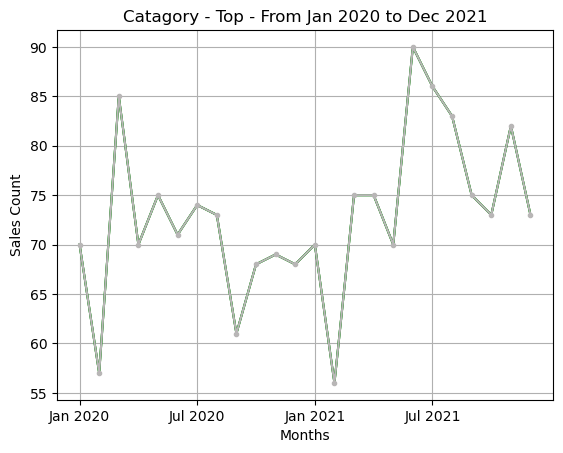

In [44]:
segments_plot(2020,2021,"Catagory",0)